In [12]:
#libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.model_selection import learning_curve , train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error 
from sklearn.linear_model import SGDRegressor
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#quad dataset 

rng = np.random.default_rng(seed=42)
m = 200 #instances
x = 6 * rng.random((m,1)) - 3
y = 0.5 * x**2 + x + 2 + rng.standard_normal((m,1))

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

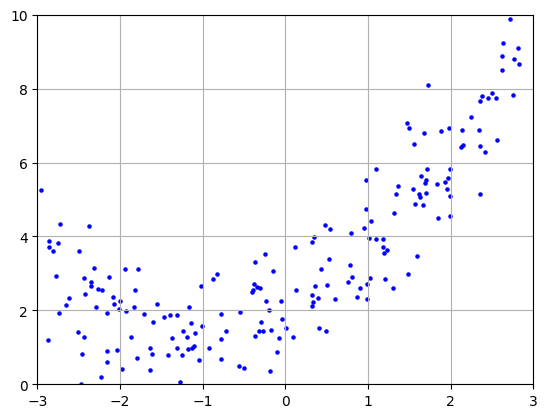

In [6]:
plt.scatter(x,y , c="b" , s=5)
plt.grid()
plt.axis([-3,3,0,10])

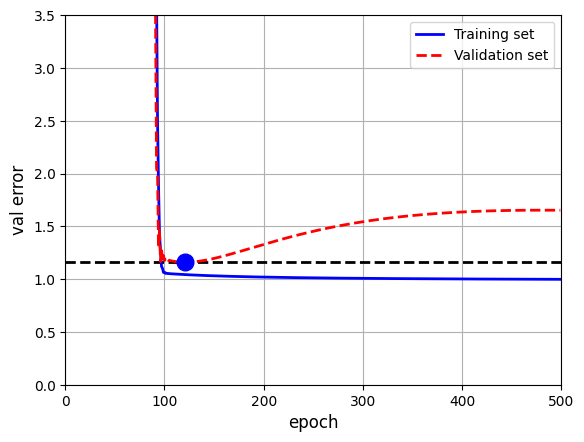

' \nmake a patience variable which denotes the number of epoch \nin which the val error isnt changed then \nincrement and compare at the last if else condition\n\n'

In [40]:
x_train , x_valid , y_train , y_valid = train_test_split(x , y , random_state=42)

preprocessing = make_pipeline(PolynomialFeatures(degree=90 , include_bias=False),
                              StandardScaler())

x_train_prep = preprocessing.fit_transform(x_train)
x_valid_prep = preprocessing.transform(x_valid)
sgd_reg =  SGDRegressor(penalty=None , eta0=0.002 , random_state=42 )
n_epochs = 500
best_valid_rmse = float('inf')
train_error_list , val_error_list = [] , []


for epoch in range(n_epochs):
    sgd_reg.partial_fit(x_train_prep , y_train.ravel())
    y_valid_predict = sgd_reg.predict(x_valid_prep)
    val_error = root_mean_squared_error(y_valid , y_valid_predict)
    val_error_list.append(val_error)
    
    y_train_predict = sgd_reg.predict(x_train_prep)
    train_error = root_mean_squared_error(y_train.ravel() , y_train_predict)
    train_error_list.append(train_error)
    
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
best_epoch = np.argmin(val_error_list) #when val error is lest
plt.plot([0 , n_epochs] , [best_valid_rmse , best_valid_rmse] , "k--", linewidth = 2)
plt.plot(train_error_list , "b-" , linewidth=2 , label="Training set")
plt.plot(val_error_list , "r--" , linewidth=2 , label="Validation set")
plt.plot(best_epoch , best_valid_rmse , "bo" , markersize=12)
plt.legend(loc="upper right" , fontsize=10)

plt.grid()
plt.xlabel("epoch" , fontsize=12)
plt.ylabel("val error" , fontsize=12)
plt.axis([0 , n_epochs , 0.0 , 3.5])


plt.show()

#in order to stop :

''' 
make a patience variable which denotes the number of epoch 
in which the val error isnt changed then 
increment and compare at the last if else condition

'''


inf
